# Q1

## a)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./diabetes_01_health_indicators.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
rows, columns = df.shape
print(f"{rows} rows and {columns} columns")
print(f"total data (rows X columns): {df.size}")
print(f"columns: {df.columns}")


253680 rows and 22 columns
total data (rows X columns): 5580960
columns: Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [4]:
df.ndim

2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
# df.isnull().any() #returns boolean
df.isnull().sum() #returns sum of null present in any column

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# b)

In [7]:
df['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

We can observe that the data for non-diabetic case is more than six times the diabetic case suggesting imbalance in the dataset. Model created using this data will create bias towards non-diabetic case. 

## c)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

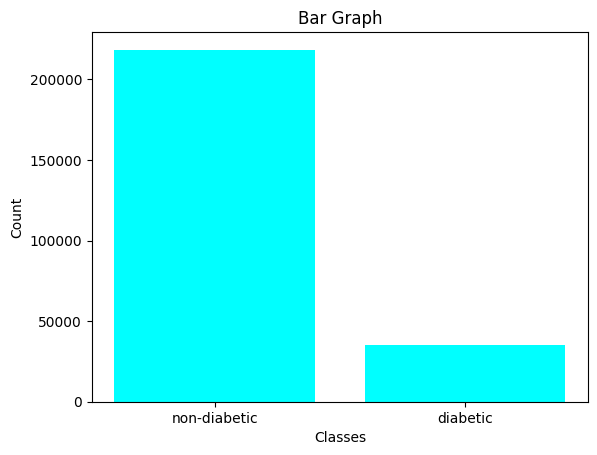

In [9]:
classes = ['non-diabetic', 'diabetic']
counts = [i for i in df['Diabetes_binary'].value_counts()]

plt.bar(classes, counts, color='cyan')  # Wider bars!
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Bar Graph")
plt.show()

## d)

In [94]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## e)

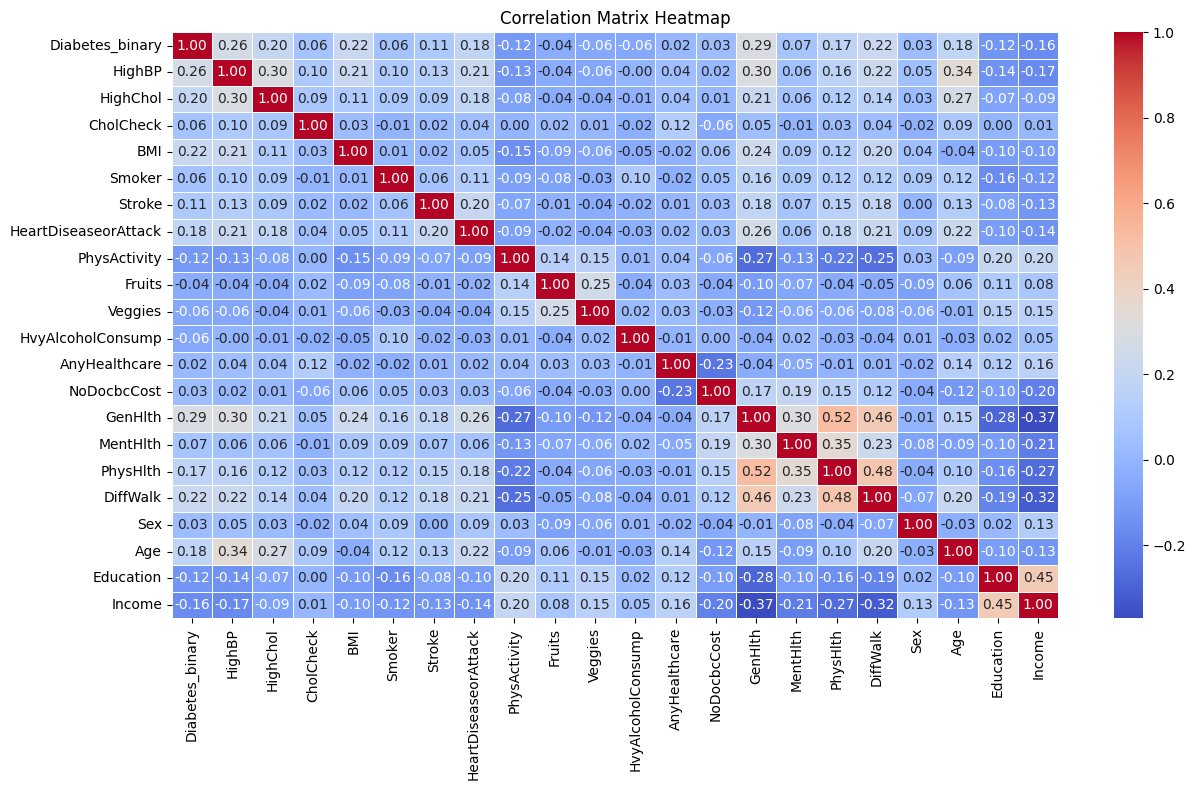

In [97]:
matrix = df.corr()

plt.figure(figsize=(13, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

Correlation is not high on any of the independent variables. So, there is no multicollinnearity.

# Q2

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [13]:
#Seperate features and target
features = df.drop(columns=['Diabetes_binary']).to_numpy()
target = df[['Diabetes_binary']].to_numpy().ravel()

In [14]:
#split data into train and test (use stratification)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=20, stratify=target)

In [15]:
#checking for imbalance
print(f"{np.unique(target_train, return_counts=True)}")
print(f"{np.unique(target_test, return_counts=True)}")

(array([0., 1.]), array([174667,  28277]))
(array([0., 1.]), array([43667,  7069]))


## a)

In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(features_train, target_train)

LogisticRegression(max_iter=1000)

In [17]:
prediction = model.predict(features_test)
logistic_prediction_probability = model.predict(features_test).ravel()

In [18]:
accuracy_score(target_test, prediction)

0.8649676758120467

In [19]:
cm = confusion_matrix(target_test, prediction)
cm

array([[42775,   892],
       [ 5959,  1110]])

In [20]:
TN, FP, FN, TP = cm.ravel()
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print(f"TP = {TP}")

TN = 42775
FP = 892
FN = 5959
TP = 1110


In [21]:
print(f"{classification_report(target_test, prediction)}")

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43667
         1.0       0.55      0.16      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.72      0.57      0.59     50736
weighted avg       0.83      0.86      0.83     50736



## b)

In [22]:
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lasso_model.fit(features_train, target_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [23]:
lasso_prediction = lasso_model.predict(features_test)

In [24]:
accuracy_score(target_test, lasso_prediction)

0.8649479659413434

In [25]:
lasso_cm = confusion_matrix(target_test, lasso_prediction)
lasso_cm

array([[42786,   881],
       [ 5971,  1098]])

In [26]:
TN, FP, FN, TP = lasso_cm.ravel()
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print(f"TP = {TP}")

TN = 42786
FP = 881
FN = 5971
TP = 1098


In [27]:
print(f"{classification_report(target_test, lasso_prediction)}")

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43667
         1.0       0.55      0.16      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.72      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736



## c)

In [28]:
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', C=0.1, max_iter=1000)
ridge_model.fit(features_train, target_train)

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')

In [29]:
ridge_prediction = ridge_model.predict(features_test)

In [30]:
accuracy_score(target_test, ridge_prediction)

0.8651647745190791

In [31]:
ridge_cm = confusion_matrix(target_test, ridge_prediction)
ridge_cm

array([[42806,   861],
       [ 5980,  1089]])

In [32]:
TN, FP, FN, TP = ridge_cm.ravel()
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print(f"TP = {TP}")

TN = 42806
FP = 861
FN = 5980
TP = 1089


In [33]:
print(f"{classification_report(target_test, ridge_prediction)}")

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43667
         1.0       0.56      0.15      0.24      7069

    accuracy                           0.87     50736
   macro avg       0.72      0.57      0.58     50736
weighted avg       0.83      0.87      0.83     50736



## d)

From 2a there is a increase of 0.01 on f1 score for diabetic (0) class with lasso regularization (2b) and with ridge regularization the accuracy increased by 0.01. In the context of model's performance, those improvements are insignificant. Thus, I would say that there is no improvement in model's performance with regularization.

# Q3

In [34]:
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier

## a)

In [35]:
# classifier
# linear_clf = svm.SVC(kernel='linear')
# linear_clf.fit(features_train, target_train)

In [36]:
# svm_linear_prediction = linear_clf.predict(features_test)

In [37]:
linear_clf = svm.LinearSVC(max_iter=1000)
linear_clf.fit(features_train, target_train)

LinearSVC()

In [38]:
linear_clf_prediction = linear_clf.predict(features_test)

In [39]:
accuracy_score(target_test, linear_clf_prediction)

0.8637456638284453

In [40]:
linear_clf_cm = confusion_matrix(target_test, linear_clf_prediction)
linear_clf_cm

array([[43340,   327],
       [ 6586,   483]])

In [41]:
TN, FP, FN, TP = linear_clf_cm.ravel()
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print(f"TP = {TP}")

TN = 43340
FP = 327
FN = 6586
TP = 483


In [42]:
print(f"{classification_report(target_test, linear_clf_prediction)}")

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43667
         1.0       0.60      0.07      0.12      7069

    accuracy                           0.86     50736
   macro avg       0.73      0.53      0.52     50736
weighted avg       0.83      0.86      0.81     50736



## b)

In [43]:
#polynomial classifier
# poly_clf = svm.SVC(kernel='poly', degree=2)
# poly_clf.fit(features_train, target_train)

In [44]:
# poly = PolynomialFeatures(degree=2, include_bias=False)
# poly_features = poly.fit_transform(features_train)

# scaler = StandardScaler()
# scaled_poly_features_train  = scaler.fit_transform(poly_features)

# poly_clf = LogisticRegression(max_iter=1000)
# poly_clf.fit(scaled_poly_features, target_train)


# using SVC from scikitlearn was slow so using alternative method for classification
# model pipeline
poly_clf = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    svm.LinearSVC(max_iter=1000)
)

poly_clf.fit(features_train, target_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC())])

In [45]:
# poly_features_test = poly.transform(features_test)
# poly_clf_prediction = poly_clf.predict(poly_features_test)


poly_clf_prediction = poly_clf.predict(features_test)

In [46]:
accuracy_score(target_test, poly_clf_prediction)

0.8671751813308105

In [47]:
poly_clf_cm = confusion_matrix(target_test, poly_clf_prediction)
poly_clf_cm

array([[43067,   600],
       [ 6139,   930]])

In [48]:
TN, FP, FN, TP = poly_clf_cm.ravel()
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print(f"TP = {TP}")

TN = 43067
FP = 600
FN = 6139
TP = 930


In [49]:
print(f"{classification_report(target_test, poly_clf_prediction)}")

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     43667
         1.0       0.61      0.13      0.22      7069

    accuracy                           0.87     50736
   macro avg       0.74      0.56      0.57     50736
weighted avg       0.84      0.87      0.83     50736



## c)

In [50]:
# rbf_model = svm.SVC(kernel='rbf', gamma='scale')
# rbf_model.fit(features_train, target_train)

In [51]:
#svm.SVC takes long time to execute and is computationally expensive
#using pipeline
gamma_scaled = 1 / (features_train.shape[1] * np.var(features_train))
print(gamma_scaled)

rbf_clf = make_pipeline(
    RBFSampler(gamma=gamma_scaled, n_components=1000, random_state=20),
    StandardScaler(),
    SGDClassifier(max_iter=1000, random_state=20)
)

rbf_clf.fit(features_train, target_train)

0.0010310673934660003


Pipeline(steps=[('rbfsampler',
                 RBFSampler(gamma=np.float64(0.0010310673934660003),
                            n_components=1000, random_state=20)),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=20))])

In [52]:
rbf_clf_prediction = rbf_clf.predict(features_test)

In [53]:
accuracy_score(target_test, rbf_clf_prediction)

0.8156929990539262

In [54]:
rbf_clf_cm = confusion_matrix(target_test, rbf_clf_prediction)
rbf_clf_cm

array([[38923,  4744],
       [ 4607,  2462]])

In [55]:
TN, FP, FN, TP = rbf_clf_cm.ravel()
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print(f"TP = {TP}")

TN = 38923
FP = 4744
FN = 4607
TP = 2462


In [56]:
print(f"{classification_report(target_test, rbf_clf_prediction)}")

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89     43667
         1.0       0.34      0.35      0.34      7069

    accuracy                           0.82     50736
   macro avg       0.62      0.62      0.62     50736
weighted avg       0.82      0.82      0.82     50736



# Q4

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam

learning rate = 0.0001 dropout rate = 0.6 accuracy = 0.8624645471572876 <br>
learning rate = 0.0001 dropout rate = 0.5 accuracy = 0.8661896586418152<br>
learning rate = 0.0001 dropout rate = 0.4 accuracy = 0.8663276433944702<br>
learning rate = 0.0001 dropout rate = 0.3 accuracy = 0.866840124130249<br>
learning rate = 0.0001 dropout rate = 0.2 accuracy = 0.8679438829421997<br>
learning rate = 0.001 dropout rate = 0.6 accuracy = 0.8668795228004456<br>
learning rate = 0.001 dropout rate = 0.5 accuracy = 0.8669977784156799<br>
learning rate = 0.001 dropout rate = 0.4 accuracy = 0.8674708008766174<br>
learning rate = 0.001 dropout rate = 0.3 accuracy = 0.8661108613014221<br>
learning rate = 0.001 dropout rate = 0.2 accuracy = 0.864750862121582<br>
learning rate = 0.01 dropout rate = 0.6 accuracy = 0.8615972995758057<br>
learning rate = 0.01 dropout rate = 0.5 accuracy = 0.8608483076095581<br>
learning rate = 0.01 dropout rate = 0.4 accuracy = 0.8644749522209167<br>
learning rate = 0.01 dropout rate = 0.3 accuracy = 0.8670766353607178<br>
learning rate = 0.01 dropout rate = 0.2 accuracy = 0.8653421401977539<br>
learning rate = 0.1 dropout rate = 0.6 accuracy = 0.8606709241867065<br>
learning rate = 0.1 dropout rate = 0.5 accuracy = 0.8606709241867065<br>
learning rate = 0.1 dropout rate = 0.4 accuracy = 0.8606709241867065<br>
learning rate = 0.1 dropout rate = 0.3 accuracy = 0.8606709241867065<br>
learning rate = 0.1 dropout rate = 0.2 accuracy = 0.8606709241867065<br>

In [58]:
# scaler = StandardScaler()
# scaled_features_train  = scaler.fit_transform(features_train)
# scaled_features_test  = scaler.transform(features_test)

# learning_rates = [0.1, 0.01, 0.001, 0.0001]
# dropout_rates = [0.2, 0.3, 0.4, 0.5, 0.6]

# for l in learning_rates:
#     for d in dropout_rates:

#         model = Sequential([
#             Input(shape=(scaled_features_train.shape[1],)),
#             Dense(128, activation='relu'),
#             Dropout(d),
#             Dense(64, activation='relu'),
#             Dropout(d),
#             Dense(1, activation='sigmoid')
#         ])
        
#         model.compile(optimizer=Adam(learning_rate=l),
#                       loss='binary_crossentropy',
#                       metrics=['accuracy'])
        
#         model.fit(scaled_features_train, target_train, epochs=100, batch_size=500, validation_split=0.2)

#         test_loss, test_accuracy = model.evaluate(scaled_features_test, target_test)

#         print(f"learning rate = {l} dropout rate = {d} accuracy = {test_accuracy}")

In [59]:
scaler = StandardScaler()
scaled_features_train  = scaler.fit_transform(features_train)
scaled_features_test  = scaler.transform(features_test)

model = Sequential([
    Input(shape=(scaled_features_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
          loss='binary_crossentropy',
          metrics=['accuracy'])

model.fit(scaled_features_train, target_train, epochs=100, batch_size=500, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(scaled_features_test, target_test)

print(f"learning rate = {0.0001} dropout rate = {0.2} accuracy = {test_accuracy}")

Epoch 1/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7412 - loss: 0.5364 - val_accuracy: 0.8629 - val_loss: 0.3327
Epoch 2/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8611 - loss: 0.3362 - val_accuracy: 0.8645 - val_loss: 0.3207
Epoch 3/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8624 - loss: 0.3279 - val_accuracy: 0.8651 - val_loss: 0.3179
Epoch 4/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8621 - loss: 0.3246 - val_accuracy: 0.8656 - val_loss: 0.3166
Epoch 5/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8629 - loss: 0.3220 - val_accuracy: 0.8660 - val_loss: 0.3157
Epoch 6/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8648 - loss: 0.3194 - val_accuracy: 0.8664 - val_loss: 0.3151
Epoch 7/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8635 - loss: 0.3207 - val_accuracy: 0.8667 - val_loss: 0.3147
Epoch 8/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8633 - loss: 0.3199 - val_accu

In [60]:
nn_predictions_probability = model.predict(scaled_features_test)

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 402us/step


In [61]:
predictions = (nn_predictions_probability >= 0.5).astype(int)
accuracy_score(target_test, predictions)

0.8678256070640177

In [62]:
cm = confusion_matrix(target_test, predictions)
cm

array([[43129,   538],
       [ 6168,   901]])

In [63]:
TN, FP, FN, TP = cm.ravel()
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print(f"TP = {TP}")

TN = 43129
FP = 538
FN = 6168
TP = 901


In [64]:
print(f"{classification_report(target_test, predictions)}")

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43667
         1.0       0.63      0.13      0.21      7069

    accuracy                           0.87     50736
   macro avg       0.75      0.56      0.57     50736
weighted avg       0.84      0.87      0.83     50736



**Deeper NN**

learning rate = 0.0005 dropout rate = 0.4 accuracy = 0.8665247559547424<br>
learning rate = 0.0001 dropout rate = 0.2 accuracy = 0.8664656281471252<br>
learning rate = 0.0001 dropout rate = 0.3 accuracy = 0.8643172383308411<br>
learning rate = 0.0001 dropout rate = 0.4 accuracy = 0.8642383813858032<br>
learning rate = 0.0003 dropout rate = 0.2 accuracy = 0.8676679134368896<br>
learning rate = 0.0003 dropout rate = 0.3 accuracy = 0.8647114634513855<br>
learning rate = 0.0003 dropout rate = 0.4 accuracy = 0.8656772375106812<br>
learning rate = 0.0005 dropout rate = 0.2 accuracy = 0.8669189810752869<br>
learning rate = 0.0005 dropout rate = 0.3 accuracy = 0.8660320043563843<br>
learning rate = 0.0005 dropout rate = 0.4 accuracy = 0.8665247559547424<br>

In [65]:
# scaler = StandardScaler()
# scaled_features_train  = scaler.fit_transform(features_train)
# scaled_features_test  = scaler.transform(features_test)

# learning_rates = [0.0001, 0.0003, 0.0005]
# dropout_rates = [0.2, 0.3, 0.4]

# performances = []

# for l in learning_rates:
#     for d in dropout_rates:

#         model = Sequential([
#             Input(shape=(scaled_features_train.shape[1],)),
#             Dense(128, activation='relu'),
#             Dropout(d),
#             Dense(64, activation='relu'), 
#             Dropout(d),
#             Dense(32, activation='relu'), 
#             Dropout(d),
#             Dense(16, activation='relu'), 
#             Dropout(d),
#             Dense(1, activation='sigmoid')
#         ])
        
#         model.compile(optimizer=Adam(learning_rate=l),
#                       loss='binary_crossentropy',
#                       metrics=['accuracy'])
        
#         model.fit(scaled_features_train, target_train, epochs=100, batch_size=500, validation_split=0.2)

#         test_loss, test_accuracy = model.evaluate(scaled_features_test, target_test)

#         performances.append([l, d, test_accuracy])
#         print(f"learning rate = {l} dropout rate = {d} accuracy = {test_accuracy}")
        
# for performance in performances:
#     print(f"learning rate = {performance[0]} dropout rate = {performance[1]} accuracy = {performance[2]}")

In [66]:
scaler = StandardScaler()
scaled_features_train  = scaler.fit_transform(features_train)
scaled_features_test  = scaler.transform(features_test)


model = Sequential([
    Input(shape=(scaled_features_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'), 
    Dropout(0.2),
    Dense(32, activation='relu'), 
    Dropout(0.2),
    Dense(16, activation='relu'), 
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0003),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(scaled_features_train, target_train, epochs=100, batch_size=500, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(scaled_features_test, target_test)

print(f"learning rate = {0.0003} dropout rate = {0.2} accuracy = {test_accuracy}")

Epoch 1/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7995 - loss: 0.4600 - val_accuracy: 0.8608 - val_loss: 0.3189
Epoch 2/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8621 - loss: 0.3349 - val_accuracy: 0.8634 - val_loss: 0.3180
Epoch 3/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8624 - loss: 0.3302 - val_accuracy: 0.8642 - val_loss: 0.3170
Epoch 4/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8610 - loss: 0.3310 - val_accuracy: 0.8646 - val_loss: 0.3160
Epoch 5/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8623 - loss: 0.3264 - val_accuracy: 0.8652 - val_loss: 0.3147
Epoch 6/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8633 - loss: 0.3233 - val_accuracy: 0.8655 - val_loss: 0.3146
Epoch 7/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8639 - loss: 0.3239 - val_accuracy: 0.8657 - val_loss: 0.3139
Epoch 8/100
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8632 - loss: 0.3245 - val_accu

In [80]:
NN_predictions_probability = model.predict(scaled_features_test)

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step


In [81]:
predictions = (NN_predictions_probability >= 0.5).astype(int)
accuracy_score(target_test, predictions)

0.8674905392620624

In [82]:
cm = confusion_matrix(target_test, predictions)
cm

array([[42952,   715],
       [ 6008,  1061]])

In [83]:
TN, FP, FN, TP = cm.ravel()
print(f"TN = {TN}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print(f"TP = {TP}")

TN = 42952
FP = 715
FN = 6008
TP = 1061


In [84]:
print(f"{classification_report(target_test, predictions)}")

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43667
         1.0       0.60      0.15      0.24      7069

    accuracy                           0.87     50736
   macro avg       0.74      0.57      0.58     50736
weighted avg       0.84      0.87      0.83     50736



# Q5

In [58]:
from sklearn.model_selection import KFold

In [69]:
#have already shuffled the data using pandas with random_state =  20. So, no random_state and shuffle parameter
kf = KFold(n_splits=5)
# kf.get_n_splits(features)
ksplit = kf.split(features)

In [70]:
for i, (train_index, test_index) in enumerate(ksplit):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[ 50736  50737  50738 ... 253677 253678 253679]
  Test:  index=[    0     1     2 ... 50733 50734 50735]
Fold 1:
  Train: index=[     0      1      2 ... 253677 253678 253679]
  Test:  index=[ 50736  50737  50738 ... 101469 101470 101471]
Fold 2:
  Train: index=[     0      1      2 ... 253677 253678 253679]
  Test:  index=[101472 101473 101474 ... 152205 152206 152207]
Fold 3:
  Train: index=[     0      1      2 ... 253677 253678 253679]
  Test:  index=[152208 152209 152210 ... 202941 202942 202943]
Fold 4:
  Train: index=[     0      1      2 ... 202941 202942 202943]
  Test:  index=[202944 202945 202946 ... 253677 253678 253679]


In [61]:
for i, (train_index, test_index) in enumerate(ksplit):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

# Bonus Question

In [76]:
from sklearn.metrics import roc_auc_score, roc_curve

In [77]:
lasso_prediction_probability = lasso_model.predict(features_test).ravel() #logistic with lasso regularization
ridge_prediction_probability = ridge_model.predict(features_test).ravel() #logistic with ridge regularization


linear_clf_prediction_probability = linear_clf.predict(features_test).ravel() #svm linear
poly_clf_prediction_probability = poly_clf.predict(features_test).ravel() #svm polynomial
rbf_clf_prediction_probability = rbf_clf.predict(features_test).ravel()   #svm rbf

In [78]:
logistic_auc = roc_auc_score(target_test, logistic_prediction_probability)
logistic_lasso_auc = roc_auc_score(target_test, lasso_prediction_probability)
logistic_ridge_auc = roc_auc_score(target_test, ridge_prediction_probability)

#svm auc
linear_clf_auc = roc_auc_score(target_test, linear_clf_prediction_probability)
poly_clf_auc = roc_auc_score(target_test, poly_clf_prediction_probability)
rbf_clf_auc = roc_auc_score(target_test, rbf_clf_prediction_probability)

#NN auc
nn_auc = roc_auc_score(target_test, nn_predictions_probability) #2 hidden layers
NN_auc = roc_auc_score(target_test, NN_predictions_probability) #4 hidden layers



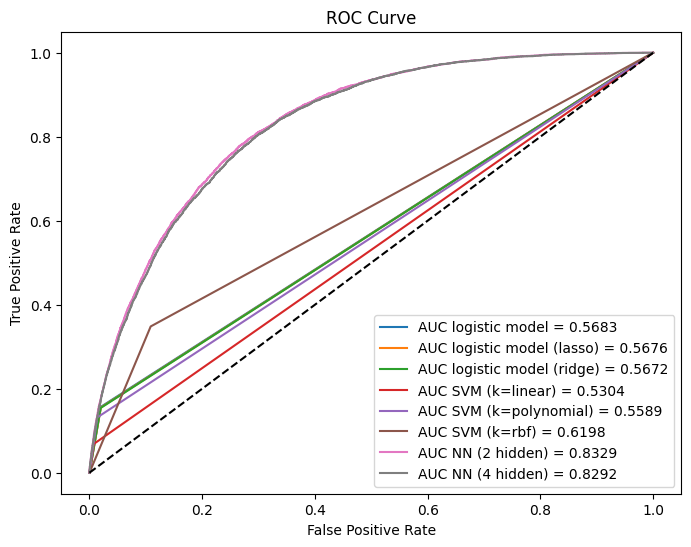

In [79]:
logistic_fpr, logistic_tpr, logistic_thresholds = roc_curve(target_test, logistic_prediction_probability)
lasso_fpr, lasso_tpr, lasso_thresholds = roc_curve(target_test, lasso_prediction_probability)
ridge_fpr, ridge_tpr, ridge_thresholds = roc_curve(target_test, ridge_prediction_probability)

linear_clf_fpr, linear_clf_tpr, linear_clf_thresholds = roc_curve(target_test, linear_clf_prediction_probability) #svm linear
poly_clf_fpr, poly_clf_tpr, poly_clf_thresholds = roc_curve(target_test, poly_clf_prediction_probability) #svm polynomial
rbf_clf_fpr, rbf_clf_tpr, rbf_clf_thresholds = roc_curve(target_test, rbf_clf_prediction_probability) #svm rbf

nn_fpr, nn_tpr, logistic_thresholds = roc_curve(target_test, nn_predictions_probability) #NN 2 hidden layer
NN_fpr, NN_tpr, NN_thresholds = roc_curve(target_test, NN_predictions_probability) #NN 4 hidden layer

plt.figure(figsize=(8, 6)) 

#logistic models
plt.plot(logistic_fpr, logistic_tpr, label=f"AUC logistic model = {logistic_auc:.4f}")
plt.plot(lasso_fpr, lasso_tpr, label=f"AUC logistic model (lasso) = {logistic_lasso_auc:.4f}")
plt.plot(ridge_fpr, ridge_tpr, label=f"AUC logistic model (ridge) = {logistic_ridge_auc:.4f}")

#svm models
plt.plot(linear_clf_fpr, linear_clf_tpr, label=f"AUC SVM (k=linear) = {linear_clf_auc:.4f}")
plt.plot(poly_clf_fpr, poly_clf_tpr, label=f"AUC SVM (k=polynomial) = {poly_clf_auc:.4f}")
plt.plot(rbf_clf_fpr, rbf_clf_tpr, label=f"AUC SVM (k=rbf) = {rbf_clf_auc:.4f}")

#NN models
plt.plot(nn_fpr, nn_tpr, label=f"AUC NN (2 hidden) = {nn_auc:.4f}")
plt.plot(NN_fpr, NN_tpr, label=f"AUC NN (4 hidden) = {NN_auc:.4f}")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()